
 ### **Task 3: SB3**
- Implement a **SB3** agent in the env of your choice


In [2]:
# ! pip install pygame
# ! pip install gymnasium
# ! pip install torch
# ! pip install highway_env
# ! pip install stable-baselines3
# ! pip install tensorboard


In [3]:
import gymnasium as gym
import matplotlib.pyplot as plt
import highway_env
import numpy as np
import tensorboard
from stable_baselines3 import DQN

from configs.config_sb3 import config_dict as config_dict_sdb3


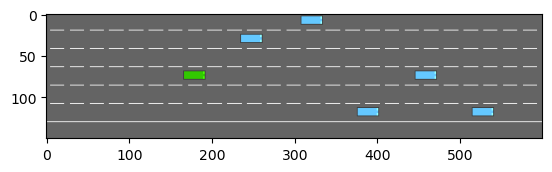

In [5]:
env = gym.make("highway-fast-v0", render_mode="rgb_array")
env.unwrapped.configure(config_dict_sdb3)
env.reset()
plt.imshow(env.render())
plt.show()

In [6]:

model = DQN('MlpPolicy', env,
              policy_kwargs=dict(net_arch=[256, 256]),
              learning_rate=5e-4,
              buffer_size=15000,
              learning_starts=200,
              batch_size=32,
              gamma=0.8,
              train_freq=1,
              gradient_steps=1,
              target_update_interval=50,
              verbose=1,
              tensorboard_log="highway_dqn/")

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [7]:

model.learn(int(1e3))
model.save("highway_dqn/model")

Logging to highway_dqn/DQN_3
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22       |
|    ep_rew_mean      | 17.5     |
|    exploration_rate | 0.164    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 5        |
|    time_elapsed     | 15       |
|    total_timesteps  | 88       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25.1     |
|    ep_rew_mean      | 19.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 5        |
|    time_elapsed     | 35       |
|    total_timesteps  | 201      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.8     |
|    ep_rew_mean      | 18.2     |
|    exploration_rate | 0.05     |
| time/               |   

In [8]:
# Load and test saved model
model = DQN.load("highway_dqn/model")

In [12]:
# Performance evaluation of the model

def evaluate_agent(env, agent, n_episodes=3):
    total_rewards = []
    n_successes = 0
    for episode in range(n_episodes):
        print(f"Evaluating episode {episode + 1}/{n_episodes}")
        obs, info = env.reset()
        done = False
        total_reward = 0
        n_step = 0
        while not done:
            n_step+=1
            action, _states = model.predict(obs, deterministic=True)
            obs, reward, done, truncated, info = env.step(action)
            total_reward += reward
            if n_step > 200:
                done = True
        total_rewards.append(total_reward)
        if not info['crashed']:
            n_successes += 1
    return np.mean(total_rewards), np.std(total_rewards), n_successes / n_episodes

# Evaluate the agent
mean_reward, std_reward, success_rate = evaluate_agent(env, model)
print(f"Mean Reward: {mean_reward:.2f} ± {std_reward:.2f}")
print(f"Success Rate: {success_rate:.2%}")

Evaluating episode 1/3
Evaluating episode 2/3
Evaluating episode 3/3
Mean Reward: 139.04 ± 40.79
Success Rate: 66.67%


Visualisation

In [ ]:
while True:
  done = truncated = False
  obs, info = env.reset()
  while not (done or truncated):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    env.render()